In [1]:
import numpy as np 
import pandas as pd 

In [2]:
filepath = 'iilp.csv'

In [3]:
df = pd.read_csv(filepath)

In [4]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [5]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

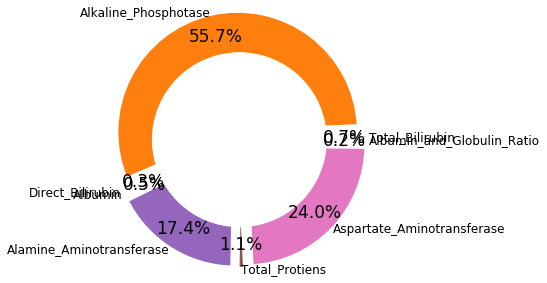

In [8]:
#percentage of chemicals in healthy people
with_disease = df[df['Dataset']==1]
with_disease = with_disease.drop(columns=['Dataset','Gender','Age'])
names = with_disease.columns.unique()
mean_of_features = with_disease.mean(axis=0,skipna=True)
names1 = ['Total_Bilirubin','Alkaline_Phosphotase','Direct_Bilirubin','Albumin','Alamine_Aminotransferase',
              'Total_Protiens','Aspartate_Aminotransferase','Albumin_and_Globulin_Ratio']
means1 = [4.164423076923075,319.00721153846155,1.923557692307693,3.0605769230769226,
             99.60576923076923,6.459134615384617,137.69951923076923,0.9141787439613527]

l_names = []
l_means = []
mydict = {}
for x,y in zip(names,mean_of_features):
    mydict[x]=y
    l_names.append(x)
    l_means.append(y)


fig = plt.figure()
plt.axis('equal')
explode = (0.09,)*(len(means1))
color_pink=['#cdb3b1','#e2f4da','#dd3497','#f768a1','#fa9fb5','#fcc5c0','#fde0dd','#fff7f3']
wedges, texts, autotexts = plt.pie( means1,
                                    explode=explode,
                                    labels=names1, 
                                    labeldistance=1,
                                    textprops=dict(color='k'),
                                    radius=1.4,
                                    autopct="%1.1f%%",
                                    pctdistance=0.8,
                                    wedgeprops = { 'linewidth' : 5, 'edgecolor' : 'white' })

plt.setp(autotexts,size=17)
plt.setp(texts,size=12)
my_circle=plt.Circle( (0,0), 1, color='white')
p=plt.gcf() 
p.gca().add_artist(my_circle) 

plt.show()

In [9]:
a=df[df['Dataset']==1]
print("Healthy Samples",len(a))
a=df[df['Dataset']==0]
print("UnHealthy Samples",len(a))

Healthy Samples 416
UnHealthy Samples 0


Text(0,0.04,'Female')

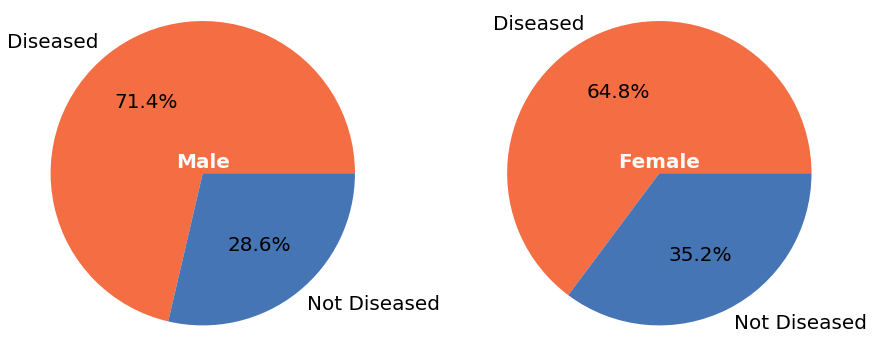

In [10]:
fig= plt.figure(figsize=(15,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

with_disease = df[df['Dataset']==1]
not_with_disease = df[df['Dataset']==2]

with_disease_m = with_disease[with_disease['Gender']=='Male']
with_disease_m = with_disease['Gender']
not_with_disease_m = not_with_disease[not_with_disease['Gender']=='Male']
not_with_disease_m = not_with_disease['Gender']

with_disease_f = with_disease[with_disease['Gender']=='Female']
not_with_disease_f = not_with_disease[not_with_disease['Gender']=='Female']

no_of_diseased_m = len(with_disease_m)
no_of_not_diseased_m = len(not_with_disease_m)

no_of_diseased_f = len(with_disease_f)
no_of_not_diseased_f = len(not_with_disease_f)

d_vs_healthy_m = [no_of_diseased_m, no_of_not_diseased_m]
d_vs_healthy_f = [no_of_diseased_f, no_of_not_diseased_f]

ax1.axis('equal')
ax2.axis('equal')
# pie plot

wedges, texts, autotexts = ax1.pie(d_vs_healthy_m, 
                                  labels=('Diseased','Not Diseased'),
                                  radius=1,
                                  textprops=dict(color='k'),
                                  colors=['#f46d43','#4575b4'],
                                  autopct="%1.1f%%")

wedges2, texts2, autotexts2 = ax2.pie(d_vs_healthy_f, 
                                  labels=('Diseased','Not Diseased'),
                                  radius=1,
                                  textprops=dict(color='k'),
                                  colors=['#f46d43','#4575b4'],
                                  autopct="%1.1f%%")

plt.setp(autotexts,size=20)
plt.setp(texts,size=20)

plt.setp(autotexts2,size=20)
plt.setp(texts2,size=20)

ax1.text(0,0.04,'Male',size=20,color='#f7fcfd',horizontalalignment='center',weight='bold')
ax2.text(0,0.04,'Female',size=20,color='#f7fcfd',horizontalalignment='center',weight='bold')

In [11]:
df['Gender']

0      Female
1        Male
2        Male
3        Male
4        Male
5        Male
6      Female
7      Female
8        Male
9        Male
10       Male
11       Male
12       Male
13     Female
14       Male
15       Male
16       Male
17       Male
18     Female
19     Female
20       Male
21       Male
22       Male
23       Male
24       Male
25       Male
26       Male
27       Male
28       Male
29     Female
        ...  
553      Male
554      Male
555      Male
556      Male
557      Male
558      Male
559      Male
560      Male
561      Male
562      Male
563      Male
564    Female
565      Male
566    Female
567      Male
568    Female
569      Male
570      Male
571      Male
572      Male
573      Male
574      Male
575      Male
576      Male
577      Male
578      Male
579      Male
580      Male
581      Male
582      Male
Name: Gender, Length: 583, dtype: object

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000018073E84DA0>,
      dtype=object)

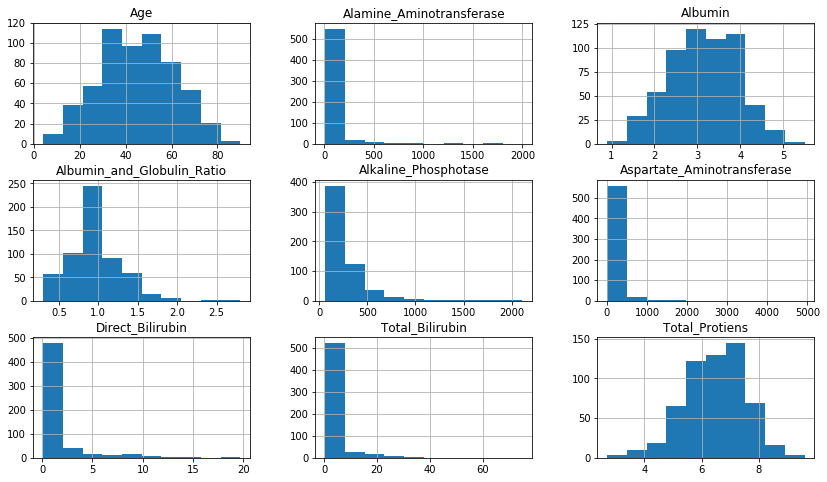

In [12]:
#Plot Histogram
disease_initial = df['Dataset']
features_initial = df.drop('Dataset', axis = 1)

import matplotlib.pyplot as plt
plt.show(block=True)
features_initial.hist(figsize=(14,8))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000180742FBB70>,
      dtype=object)

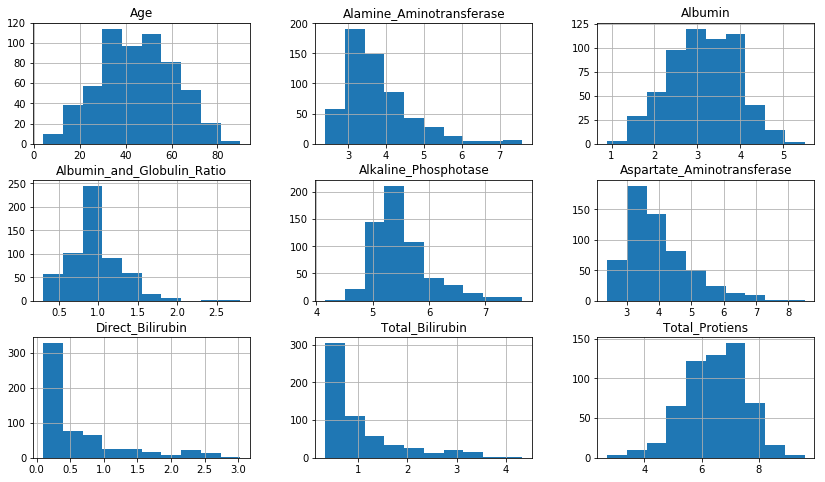

In [13]:
#from above histograms it is visualized that skewed features are
"""Alamine_Aminotransferase
Alkaline_Phosphotase
Aspartate_Aminotransferase
Direct_Bilirubin
Total_Bilirubin"""

skewed = ['Alamine_Aminotransferase', 'Direct_Bilirubin', 'Total_Bilirubin', 'Alkaline_Phosphotase', 'Aspartate_Aminotransferase']
features_initial[skewed] = df[skewed].apply(lambda x: np.log(x + 1))
df[skewed]=features_initial[skewed]
# Visualize the new log distributions
features_initial.hist(figsize=(14,8))

In [14]:
df['Gender']

0      Female
1        Male
2        Male
3        Male
4        Male
5        Male
6      Female
7      Female
8        Male
9        Male
10       Male
11       Male
12       Male
13     Female
14       Male
15       Male
16       Male
17       Male
18     Female
19     Female
20       Male
21       Male
22       Male
23       Male
24       Male
25       Male
26       Male
27       Male
28       Male
29     Female
        ...  
553      Male
554      Male
555      Male
556      Male
557      Male
558      Male
559      Male
560      Male
561      Male
562      Male
563      Male
564    Female
565      Male
566    Female
567      Male
568    Female
569      Male
570      Male
571      Male
572      Male
573      Male
574      Male
575      Male
576      Male
577      Male
578      Male
579      Male
580      Male
581      Male
582      Male
Name: Gender, Length: 583, dtype: object

In [15]:
df['Dataset']

0      1
1      1
2      1
3      1
4      1
5      1
6      1
7      1
8      2
9      1
10     1
11     1
12     2
13     1
14     1
15     2
16     1
17     2
18     1
19     1
20     1
21     1
22     1
23     1
24     2
25     1
26     1
27     1
28     2
29     2
      ..
553    1
554    1
555    1
556    1
557    1
558    1
559    1
560    1
561    1
562    1
563    1
564    2
565    1
566    2
567    1
568    1
569    1
570    1
571    1
572    1
573    1
574    1
575    1
576    1
577    1
578    2
579    1
580    1
581    1
582    2
Name: Dataset, Length: 583, dtype: int64

In [16]:
#changing gender
#Male:0 Female:1
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(df['Gender'])
label_encoder.transform(df['Gender'])
#df['Age'] = pd.qcut(df['Age'].values, 9,duplicates='drop').codes + 1
#normalized
normalized_df=(df-df.min())/(df.max()-df.min())
df=normalized_df
display(df)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,0.709302,1.0,0.048609,0.000000,0.308223,0.083659,0.089521,0.594203,0.521739,0.240,0.0
1,0.674419,0.0,0.535785,0.605315,0.684260,0.341403,0.363170,0.695652,0.500000,0.176,0.0
2,0.674419,0.0,0.445585,0.522665,0.582821,0.329197,0.300762,0.623188,0.521739,0.236,0.0
3,0.627907,0.0,0.089297,0.082173,0.300513,0.059605,0.105914,0.594203,0.543478,0.280,0.0
4,0.790698,0.0,0.313641,0.341861,0.320143,0.179554,0.277870,0.666667,0.326087,0.040,0.0
5,0.488372,0.0,0.173536,0.148329,0.338512,0.114891,0.050802,0.710145,0.760870,0.400,0.0
6,0.255814,1.0,0.076455,0.029648,0.253013,0.083659,0.027363,0.623188,0.565217,0.280,0.0
7,0.290698,1.0,0.076455,0.056921,0.330181,0.059605,0.014252,0.579710,0.586957,0.320,0.0
8,0.151163,0.0,0.076455,0.056921,0.330181,0.141750,0.097923,0.681159,0.695652,0.360,1.0
9,0.593023,0.0,0.048609,0.029648,0.433188,0.305772,0.275117,0.594203,0.543478,0.280,0.0


In [15]:
#dropping null values
df.dropna(inplace=True)
# summarize the number of rows and columns in the dataset
print(df.shape)


(579, 11)


In [17]:
#upsampling classes
df_1=df[df.Dataset==0] #disease
df_2=df[df.Dataset==1] #no_disease
from sklearn.utils import resample
# Upsample minority class
df_minority_upsampled = resample(df_2, 
                                 replace=True,       # sample with replacement
                                 n_samples=416,    # to match majority class
                                 random_state=123)   # reproducible results

# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_1, df_minority_upsampled])

# Display new class counts
# df_upsampled.value_counts()
display(len(df_upsampled))
df_2_updated=df_upsampled[df_upsampled.Dataset==1]
display(df_2_updated.head())
'''#separate target of normal data
X1 = df.iloc[:,:-1].values
target1 = df.iloc[:,-1].values
#convert all 2's to zeroes
for u in range(len(target1)):
    if target1[u] == 2:
        target1[u] = 0'''
'''df['Dataset']=target
print(len(X))
print(len(target))'''

#separate target of upsampled class
'''X2 = df_upsampled.iloc[:,:-1].values
target2 = df_upsampled.iloc[:,-1].values
#convert all 2's to zeroes
for u in range(len(target2)):
    if target2[u] == 2:
        target2[u] = 0'''
'''df['Dataset']=target
print(len(X))
print(len(target))'''

832

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
377,0.186047,1.0,0.033431,0.029648,0.330181,0.032104,0.039501,0.492754,0.456522,0.240,1.0
433,0.430233,1.0,0.076455,0.029648,0.328768,0.205216,0.134472,0.710145,0.630435,0.280,1.0
258,0.372093,0.0,0.062919,0.029648,0.300513,0.205216,0.189585,0.536232,0.630435,0.440,1.0
359,0.755814,1.0,0.062919,0.029648,0.237855,0.261997,0.305442,0.826087,0.869565,0.440,1.0
59,0.697674,0.0,0.101512,0.105681,0.235903,0.124268,0.134472,0.405797,0.500000,0.436,1.0


"df['Dataset']=target\nprint(len(X))\nprint(len(target))"

In [18]:
display(df_upsampled)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,0.709302,1.0,0.048609,0.000000,0.308223,0.083659,0.089521,0.594203,0.521739,0.240,0.0
1,0.674419,0.0,0.535785,0.605315,0.684260,0.341403,0.363170,0.695652,0.500000,0.176,0.0
2,0.674419,0.0,0.445585,0.522665,0.582821,0.329197,0.300762,0.623188,0.521739,0.236,0.0
3,0.627907,0.0,0.089297,0.082173,0.300513,0.059605,0.105914,0.594203,0.543478,0.280,0.0
4,0.790698,0.0,0.313641,0.341861,0.320143,0.179554,0.277870,0.666667,0.326087,0.040,0.0
5,0.488372,0.0,0.173536,0.148329,0.338512,0.114891,0.050802,0.710145,0.760870,0.400,0.0
6,0.255814,1.0,0.076455,0.029648,0.253013,0.083659,0.027363,0.623188,0.565217,0.280,0.0
7,0.290698,1.0,0.076455,0.056921,0.330181,0.059605,0.014252,0.579710,0.586957,0.320,0.0
9,0.593023,0.0,0.048609,0.029648,0.433188,0.305772,0.275117,0.594203,0.543478,0.280,0.0
10,0.616279,0.0,0.033431,0.000000,0.341237,0.298520,0.277870,0.463768,0.391304,0.200,0.0


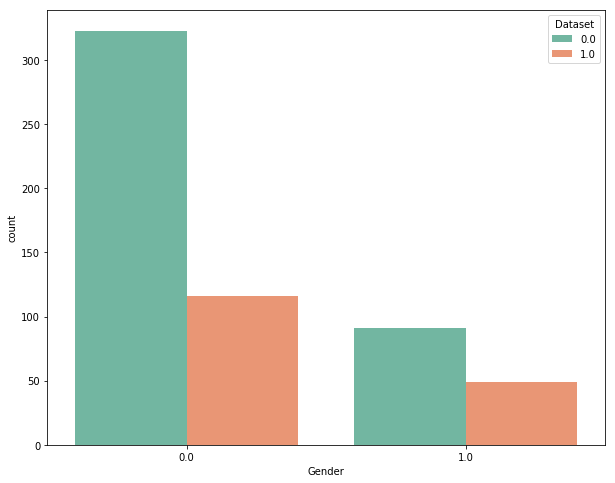

In [42]:
from matplotlib import rcParams
import seaborn as sns
rcParams['figure.figsize']=10,8
sns.countplot(x='Gender',hue='Dataset',data=df,palette="Set2");

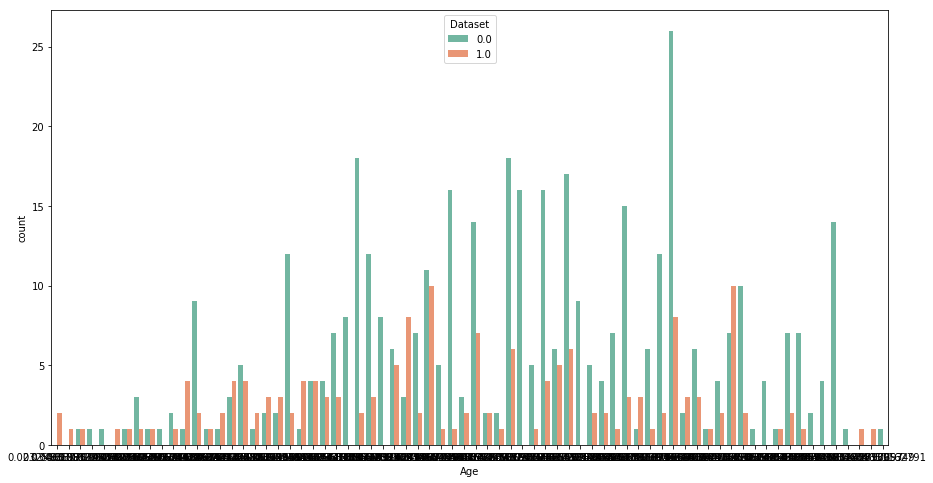

In [41]:
from matplotlib import rcParams
import seaborn as sns
rcParams['figure.figsize']=15,8
sns.countplot(x='Age',hue='Dataset',data=df,palette="Set2");

In [18]:
#feature selection
#Technique:1::univariate selection in normal data
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import numpy as np
array = df.values
X_1 = array[:,0:10]
Y_1 = array[:,10]
display(X_1.shape)
# feature extraction
test = SelectKBest(score_func=chi2, k=7)
fit = test.fit(X_1, Y_1)
# summarize scores
np.set_printoptions(precision=3)
print(fit.scores_)
features1 = fit.transform(X_1)
# summarize selected features
print(features1[0:5,:])


#feature selection
#univariate selection in upsampled data
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import numpy as np
array = df_upsampled.values
X_11 = array[:,0:10]
Y_11 = array[:,10]
display(X_11.shape)
# feature extraction
test = SelectKBest(score_func=chi2, k=7)
fit = test.fit(X_11, Y_11)
# summarize scores
np.set_printoptions(precision=3)
print(fit.scores_)
features2 = fit.transform(X_11)
# summarize selected features
print(features2[0:5,:])


(579, 10)

[ 0.769  2.905  9.961 15.371  1.797  5.064  5.193  0.029  0.904  0.971]
[[1.    0.049 0.    0.308 0.084 0.09  0.24 ]
 [0.    0.536 0.605 0.684 0.341 0.363 0.176]
 [0.    0.446 0.523 0.583 0.329 0.301 0.236]
 [0.    0.089 0.082 0.301 0.06  0.106 0.28 ]
 [0.    0.314 0.342 0.32  0.18  0.278 0.04 ]]


(830, 10)

[ 1.53   5.773 21.011 35.464  3.253  9.193 10.02   0.267  1.985  1.414]
[[1.    0.049 0.    0.308 0.084 0.09  0.522]
 [0.    0.536 0.605 0.684 0.341 0.363 0.5  ]
 [0.    0.446 0.523 0.583 0.329 0.301 0.522]
 [0.    0.089 0.082 0.301 0.06  0.106 0.543]
 [0.    0.314 0.342 0.32  0.18  0.278 0.326]]


In [19]:
#Technique:2::recursive feature elimination on normal data
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
array = df.values
X_1 = array[:,0:10]
Y_1 = array[:,10]
# feature extraction
model = LogisticRegression()
rfe = RFE(model, 8)
fit = rfe.fit(X_1, Y_1)
print("Num Features: %d" % (fit.n_features_))
print("Selected Features: %s" %( fit.support_))
print("Feature Ranking: %s" %(fit.ranking_))
features_rfe1=df[['Age','Total_Bilirubin','Direct_Bilirubin','Alkaline_Phosphotase','Alamine_Aminotransferase','Aspartate_Aminotransferase','Albumin','Albumin_and_Globulin_Ratio']].values


#recursive feature elimination on upsampled data
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
array = df_upsampled.values
X_11 = array[:,0:10]
Y_11 = array[:,10]
# feature extraction
model = LogisticRegression()
rfe = RFE(model, 8)
fit = rfe.fit(X_11, Y_11)
print("Num Features: %d" % (fit.n_features_))
print("Selected Features: %s" %( fit.support_))
print("Feature Ranking: %s" %(fit.ranking_))
features_rfe2=df_upsampled[['Age','Total_Bilirubin','Direct_Bilirubin','Alkaline_Phosphotase','Alamine_Aminotransferase','Aspartate_Aminotransferase','Total_Protiens','Albumin']].values


Num Features: 8
Selected Features: [ True False  True  True  True  True  True False  True  True]
Feature Ranking: [1 3 1 1 1 1 1 2 1 1]
Num Features: 8
Selected Features: [ True False  True  True  True  True  True  True  True False]
Feature Ranking: [1 3 1 1 1 1 1 1 1 2]


In [ ]:
#feature importance
#Technique:3::extra trees classifier
from sklearn.ensemble import ExtraTreesClassifier
array = df.values
X_1 = array[:,0:10]
Y_1 = array[:,10]
# feature extraction
model = ExtraTreesClassifier()
model.fit(X_1, Y_1)
print(model.feature_importances_)
features_etc11=df[['Age','Total_Bilirubin','Direct_Bilirubin','Alkaline_Phosphotase','Alamine_Aminotransferase','Aspartate_Aminotransferase','Albumin','Albumin_and_Globulin_Ratio']].values
features_etc12=df[['Age','Total_Bilirubin','Direct_Bilirubin','Alkaline_Phosphotase','Alamine_Aminotransferase','Aspartate_Aminotransferase','Albumin_and_Globulin_Ratio']].values



#feature importance
#extra trees classifier on upsampled class
from sklearn.ensemble import ExtraTreesClassifier
array = df_upsampled.values
X_11 = array[:,0:10]
Y_11 = array[:,10]
# feature extraction
model = ExtraTreesClassifier()
model.fit(X_11, Y_11)
print(model.feature_importances_)
features_etc21=df_upsampled[['Age','Total_Bilirubin','Direct_Bilirubin','Alkaline_Phosphotase','Alamine_Aminotransferase','Aspartate_Aminotransferase','Total_Protiens','Albumin','Albumin_and_Globulin_Ratio']].values
features_etc22=df_upsampled[['Age','Total_Bilirubin','Direct_Bilirubin','Alkaline_Phosphotase','Alamine_Aminotransferase','Aspartate_Aminotransferase','Albumin']].values


In [22]:
#counting no of classes
all_classes=df['Dataset'].values
all_classes
all_classes1=df_upsampled['Dataset'].values
len(all_classes1) #upsampled 
len(all_classes) #normal

579

###Logistic Regression

In [23]:
import numpy
from sklearn.model_selection import train_test_split

#features 1
X_train, X_test, y_train, y_test = train_test_split(features1, all_classes, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

#features 2
X_train, X_test, y_train, y_test = train_test_split(features2,all_classes1, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

Accuracy of logistic regression classifier on test set: 0.70
[[120   2]
 [ 50   2]]
             precision    recall  f1-score   support

        0.0       0.71      0.98      0.82       122
        1.0       0.50      0.04      0.07        52

avg / total       0.64      0.70      0.60       174

Accuracy of logistic regression classifier on test set: 0.71
[[78 45]
 [28 98]]
             precision    recall  f1-score   support

        0.0       0.74      0.63      0.68       123
        1.0       0.69      0.78      0.73       126

avg / total       0.71      0.71      0.71       249



In [24]:
import numpy
from sklearn.model_selection import train_test_split

#features_rfe1
X_train, X_test, y_train, y_test = train_test_split(features_rfe1, all_classes, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


#features_rfe2
X_train1, X_test1, y_train1, y_test1 = train_test_split(features_rfe2,all_classes1, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train1, y_train1)
y_pred1 = logreg.predict(X_test1)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test1, y_test1)))
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test1, y_pred1)
print(confusion_matrix)
from sklearn.metrics import classification_report
print(classification_report(y_test1, y_pred1))

Accuracy of logistic regression classifier on test set: 0.71
[[120   2]
 [ 48   4]]
             precision    recall  f1-score   support

        0.0       0.71      0.98      0.83       122
        1.0       0.67      0.08      0.14        52

avg / total       0.70      0.71      0.62       174

Accuracy of logistic regression classifier on test set: 0.71
[[81 42]
 [29 97]]
             precision    recall  f1-score   support

        0.0       0.74      0.66      0.70       123
        1.0       0.70      0.77      0.73       126

avg / total       0.72      0.71      0.71       249



In [25]:
import numpy
from sklearn.model_selection import train_test_split

#features_etc11
X_train, X_test, y_train, y_test = train_test_split(features_etc11, all_classes, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


#features_etc12
X_train1, X_test1, y_train1, y_test1 = train_test_split(features_etc12,all_classes, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train1, y_train1)
y_pred1 = logreg.predict(X_test1)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test1, y_test1)))
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test1, y_pred1)
print(confusion_matrix)
from sklearn.metrics import classification_report
print(classification_report(y_test1, y_pred1))

Accuracy of logistic regression classifier on test set: 0.71
[[120   2]
 [ 48   4]]
             precision    recall  f1-score   support

        0.0       0.71      0.98      0.83       122
        1.0       0.67      0.08      0.14        52

avg / total       0.70      0.71      0.62       174

Accuracy of logistic regression classifier on test set: 0.71
[[120   2]
 [ 49   3]]
             precision    recall  f1-score   support

        0.0       0.71      0.98      0.82       122
        1.0       0.60      0.06      0.11        52

avg / total       0.68      0.71      0.61       174



In [26]:
import numpy
from sklearn.model_selection import train_test_split

#features_etc21
X_train, X_test, y_train, y_test = train_test_split(features_etc21, all_classes1, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


#features_etc22
X_train1, X_test1, y_train1, y_test1 = train_test_split(features_etc22,all_classes1, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train1, y_train1)
y_pred1 = logreg.predict(X_test1)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test1, y_test1)))
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test1, y_pred1)
print(confusion_matrix)
from sklearn.metrics import classification_report
print(classification_report(y_test1, y_pred1))

Accuracy of logistic regression classifier on test set: 0.72
[[82 41]
 [29 97]]
             precision    recall  f1-score   support

        0.0       0.74      0.67      0.70       123
        1.0       0.70      0.77      0.73       126

avg / total       0.72      0.72      0.72       249

Accuracy of logistic regression classifier on test set: 0.72
[[82 41]
 [29 97]]
             precision    recall  f1-score   support

        0.0       0.74      0.67      0.70       123
        1.0       0.70      0.77      0.73       126

avg / total       0.72      0.72      0.72       249



In [56]:
clf = LogisticRegression()
cv_scores = cross_val_score(clf, features2, all_classes1, cv=10)
print(cv_scores.mean())

0.690197374865315


In [57]:
clf = LogisticRegression()
cv_scores = cross_val_score(clf, features_rfe2, all_classes1, cv=10)
print(cv_scores.mean())

0.7000545736954787


In [58]:
clf = LogisticRegression()
cv_scores = cross_val_score(clf, features_etc21, all_classes1, cv=10)
print(cv_scores.mean())

0.6988640975050027


In [27]:
import nltk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, confusion_matrix
clfs = {
    'mnb': MultinomialNB(),
    'gnb': GaussianNB(),
    'svm1': SVC(kernel='linear'),
    'svm2': SVC(kernel='rbf'),
    'svm3': SVC(kernel='sigmoid'),
    'mlp1': MLPClassifier(),
    'mlp2': MLPClassifier(hidden_layer_sizes=[100, 100]),
    'ada': AdaBoostClassifier(),
    'dtc': DecisionTreeClassifier(),
    'rfc': RandomForestClassifier(),
    'gbc': GradientBoostingClassifier(),
    'lr': LogisticRegression()
}

## Naive Bayes 

In [28]:
import numpy
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

#features 1
X_train, X_test, y_train, y_test = train_test_split(features1, all_classes, test_size=0.3, random_state=0)
logreg = MultinomialNB()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of Naive Bayes classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

#features 2
X_train, X_test, y_train, y_test = train_test_split(features2,all_classes1, test_size=0.3, random_state=0)
logreg = MultinomialNB()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of Naive Bayes classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

Accuracy of Naive Bayes classifier on test set: 0.70
[[122   0]
 [ 52   0]]
             precision    recall  f1-score   support

        0.0       0.70      1.00      0.82       122
        1.0       0.00      0.00      0.00        52

avg / total       0.49      0.70      0.58       174

Accuracy of Naive Bayes classifier on test set: 0.67
[[83 40]
 [41 85]]
             precision    recall  f1-score   support

        0.0       0.67      0.67      0.67       123
        1.0       0.68      0.67      0.68       126

avg / total       0.67      0.67      0.67       249



C:\Users\shreya kumari\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [29]:
import numpy
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

#features_rfe1
X_train, X_test, y_train, y_test = train_test_split(features_rfe1, all_classes, test_size=0.3, random_state=0)
logreg = MultinomialNB()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of Naive Bayes classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


#features_rfe2
X_train1, X_test1, y_train1, y_test1 = train_test_split(features_rfe2,all_classes1, test_size=0.3, random_state=0)
logreg = MultinomialNB()
logreg.fit(X_train1, y_train1)
y_pred1 = logreg.predict(X_test1)
print('Accuracy of Naive Bayes classifier on test set: {:.2f}'.format(logreg.score(X_test1, y_test1)))
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test1, y_pred1)
print(confusion_matrix)
from sklearn.metrics import classification_report
print(classification_report(y_test1, y_pred1))

Accuracy of Naive Bayes classifier on test set: 0.70
[[122   0]
 [ 52   0]]
             precision    recall  f1-score   support

        0.0       0.70      1.00      0.82       122
        1.0       0.00      0.00      0.00        52

avg / total       0.49      0.70      0.58       174

Accuracy of Naive Bayes classifier on test set: 0.70
[[ 71  52]
 [ 23 103]]
             precision    recall  f1-score   support

        0.0       0.76      0.58      0.65       123
        1.0       0.66      0.82      0.73       126

avg / total       0.71      0.70      0.69       249



C:\Users\shreya kumari\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [30]:
import numpy
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
#features_etc11
X_train, X_test, y_train, y_test = train_test_split(features_etc11, all_classes, test_size=0.3, random_state=0)
logreg = MultinomialNB()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of Naive Bayes classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


#features_etc12
X_train1, X_test1, y_train1, y_test1 = train_test_split(features_etc12,all_classes, test_size=0.3, random_state=0)
logreg = MultinomialNB()
logreg.fit(X_train1, y_train1)
y_pred1 = logreg.predict(X_test1)
print('Accuracy of Naive Bayes classifier on test set: {:.2f}'.format(logreg.score(X_test1, y_test1)))
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test1, y_pred1)
print(confusion_matrix)
from sklearn.metrics import classification_report
print(classification_report(y_test1, y_pred1))

Accuracy of Naive Bayes classifier on test set: 0.70
[[122   0]
 [ 52   0]]
             precision    recall  f1-score   support

        0.0       0.70      1.00      0.82       122
        1.0       0.00      0.00      0.00        52

avg / total       0.49      0.70      0.58       174

Accuracy of Naive Bayes classifier on test set: 0.70
[[122   0]
 [ 52   0]]
             precision    recall  f1-score   support

        0.0       0.70      1.00      0.82       122
        1.0       0.00      0.00      0.00        52

avg / total       0.49      0.70      0.58       174



C:\Users\shreya kumari\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\shreya kumari\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [31]:
import numpy
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
#features_etc21
X_train, X_test, y_train, y_test = train_test_split(features_etc21, all_classes1, test_size=0.3, random_state=0)
logreg = MultinomialNB()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of Niave Bayes classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


#features_etc22
X_train1, X_test1, y_train1, y_test1 = train_test_split(features_etc22,all_classes1, test_size=0.3, random_state=0)
logreg = MultinomialNB()
logreg.fit(X_train1, y_train1)
y_pred1 = logreg.predict(X_test1)
print('Accuracy of Naive Bayes classifier on test set: {:.2f}'.format(logreg.score(X_test1, y_test1)))
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test1, y_pred1)
print(confusion_matrix)
from sklearn.metrics import classification_report
print(classification_report(y_test1, y_pred1))

Accuracy of Niave Bayes classifier on test set: 0.71
[[ 73  50]
 [ 22 104]]
             precision    recall  f1-score   support

        0.0       0.77      0.59      0.67       123
        1.0       0.68      0.83      0.74       126

avg / total       0.72      0.71      0.71       249

Accuracy of Naive Bayes classifier on test set: 0.69
[[ 70  53]
 [ 23 103]]
             precision    recall  f1-score   support

        0.0       0.75      0.57      0.65       123
        1.0       0.66      0.82      0.73       126

avg / total       0.71      0.69      0.69       249



## Naive Bayes

In [53]:
clf = MultinomialNB()
cv_scores = cross_val_score(clf, features2, all_classes1, cv=10)
print(cv_scores.mean())

0.6518565551404223


In [54]:
clf = MultinomialNB()
cv_scores = cross_val_score(clf, features_rfe2, all_classes1, cv=10)
print(cv_scores.mean())

0.6733722345829309


In [55]:
clf = MultinomialNB()
cv_scores = cross_val_score(clf, features_etc21, all_classes1, cv=10)
print(cv_scores.mean())

0.6782208975273918


## Neural Network

In [88]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

def create_model1():
    model = Sequential()
    #4 feature inputs going into an 6-unit layer (more does not seem to help - in fact you can go down to 4)
    model.add(Dense(500, input_dim=7, kernel_initializer='normal', activation='relu'))
    model.add(Dense(500, kernel_initializer='normal', activation='relu'))
    # Output layer with a binary classification (benign or malignant)
    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
    # Compile model; adam seemed to work best
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [90]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
def create_model2():
    model = Sequential()
    #4 feature inputs going into an 6-unit layer (more does not seem to help - in fact you can go down to 4)
    model.add(Dense(500, input_dim=8, kernel_initializer='normal', activation='relu'))
    model.add(Dense(500, kernel_initializer='normal', activation='relu'))
    # Output layer with a binary classification (benign or malignant)
    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
    # Compile model; adam seemed to work best
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [91]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

def create_model3():
    model = Sequential()
    #4 feature inputs going into an 6-unit layer (more does not seem to help - in fact you can go down to 4)
    model.add(Dense(500, input_dim=9, kernel_initializer='normal', activation='relu'))
    model.add(Dense(500, kernel_initializer='normal', activation='relu'))
    # Output layer with a binary classification (benign or malignant)
    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
    # Compile model; adam seemed to work best
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [92]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

def create_model4():
    model = Sequential()
    #4 feature inputs going into an 6-unit layer (more does not seem to help - in fact you can go down to 4)
    model.add(Dense(500, input_dim=10, kernel_initializer='normal', activation='relu'))
    model.add(Dense(500, kernel_initializer='normal', activation='relu'))
    # Output layer with a binary classification (benign or malignant)
    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
    # Compile model; adam seemed to work best
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [99]:
#done
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
# Wrap our Keras model in an estimator compatible with scikit_learn
estimator = KerasClassifier(build_fn=create_model1, epochs=100, verbose=2)
# Now we can use scikit_learn's cross_val_score to evaluate this model identically to the others
cv_scores = cross_val_score(estimator,features2, all_classes1, cv=10)
cv_scores.mean()

Epoch 1/100
 - 2s - loss: 0.6400 - acc: 0.6439
Epoch 2/100
 - 0s - loss: 0.5853 - acc: 0.6961
Epoch 3/100
 - 0s - loss: 0.5832 - acc: 0.6921
Epoch 4/100
 - 0s - loss: 0.5694 - acc: 0.6961
Epoch 5/100
 - 0s - loss: 0.5689 - acc: 0.7041
Epoch 6/100
 - 0s - loss: 0.5649 - acc: 0.7068
Epoch 7/100
 - 0s - loss: 0.5619 - acc: 0.7108
Epoch 8/100
 - 0s - loss: 0.5669 - acc: 0.7122
Epoch 9/100
 - 0s - loss: 0.5688 - acc: 0.7001
Epoch 10/100
 - 0s - loss: 0.5580 - acc: 0.7149
Epoch 11/100
 - 0s - loss: 0.5547 - acc: 0.7216
Epoch 12/100
 - 0s - loss: 0.5536 - acc: 0.7108
Epoch 13/100
 - 0s - loss: 0.5586 - acc: 0.7162
Epoch 14/100
 - 0s - loss: 0.5509 - acc: 0.7242
Epoch 15/100
 - 0s - loss: 0.5490 - acc: 0.7175
Epoch 16/100
 - 0s - loss: 0.5460 - acc: 0.7242
Epoch 17/100
 - 0s - loss: 0.5448 - acc: 0.7309
Epoch 18/100
 - 0s - loss: 0.5500 - acc: 0.7175
Epoch 19/100
 - 0s - loss: 0.5394 - acc: 0.7376
Epoch 20/100
 - 0s - loss: 0.5367 - acc: 0.7323
Epoch 21/100
 - 0s - loss: 0.5324 - acc: 0.7229
E

 - 0s - loss: 0.4090 - acc: 0.8059
Epoch 73/100
 - 0s - loss: 0.3934 - acc: 0.8126
Epoch 74/100
 - 0s - loss: 0.3913 - acc: 0.8193
Epoch 75/100
 - 0s - loss: 0.3907 - acc: 0.8112
Epoch 76/100
 - 0s - loss: 0.3896 - acc: 0.8139
Epoch 77/100
 - 0s - loss: 0.3990 - acc: 0.8112
Epoch 78/100
 - 0s - loss: 0.3987 - acc: 0.8139
Epoch 79/100
 - 0s - loss: 0.3815 - acc: 0.8246
Epoch 80/100
 - 0s - loss: 0.3749 - acc: 0.8139
Epoch 81/100
 - 0s - loss: 0.3855 - acc: 0.8193
Epoch 82/100
 - 0s - loss: 0.3892 - acc: 0.8099
Epoch 83/100
 - 0s - loss: 0.3946 - acc: 0.8193
Epoch 84/100
 - 0s - loss: 0.3942 - acc: 0.8220
Epoch 85/100
 - 0s - loss: 0.3796 - acc: 0.8300
Epoch 86/100
 - 0s - loss: 0.3670 - acc: 0.8273
Epoch 87/100
 - 0s - loss: 0.3679 - acc: 0.8353
Epoch 88/100
 - 0s - loss: 0.3592 - acc: 0.8340
Epoch 89/100
 - 0s - loss: 0.3584 - acc: 0.8434
Epoch 90/100
 - 0s - loss: 0.3582 - acc: 0.8407
Epoch 91/100
 - 0s - loss: 0.3723 - acc: 0.8233
Epoch 92/100
 - 0s - loss: 0.3847 - acc: 0.8260
Epoch

Epoch 44/100
 - 0s - loss: 0.4292 - acc: 0.7992
Epoch 45/100
 - 0s - loss: 0.4238 - acc: 0.7992
Epoch 46/100
 - 0s - loss: 0.4396 - acc: 0.7885
Epoch 47/100
 - 0s - loss: 0.4474 - acc: 0.7818
Epoch 48/100
 - 0s - loss: 0.4282 - acc: 0.7885
Epoch 49/100
 - 0s - loss: 0.4146 - acc: 0.7992
Epoch 50/100
 - 0s - loss: 0.4182 - acc: 0.8046
Epoch 51/100
 - 0s - loss: 0.4240 - acc: 0.8005
Epoch 52/100
 - 0s - loss: 0.4019 - acc: 0.8179
Epoch 53/100
 - 0s - loss: 0.4188 - acc: 0.8019
Epoch 54/100
 - 0s - loss: 0.3993 - acc: 0.8153
Epoch 55/100
 - 0s - loss: 0.4083 - acc: 0.8059
Epoch 56/100
 - 0s - loss: 0.4017 - acc: 0.8099
Epoch 57/100
 - 0s - loss: 0.3975 - acc: 0.8246
Epoch 58/100
 - 0s - loss: 0.3912 - acc: 0.8286
Epoch 59/100
 - 0s - loss: 0.3988 - acc: 0.8260
Epoch 60/100
 - 0s - loss: 0.3737 - acc: 0.8313
Epoch 61/100
 - 0s - loss: 0.3786 - acc: 0.8353
Epoch 62/100
 - 0s - loss: 0.3871 - acc: 0.8300
Epoch 63/100
 - 0s - loss: 0.3764 - acc: 0.8353
Epoch 64/100
 - 0s - loss: 0.3740 - acc:

 - 0s - loss: 0.5455 - acc: 0.6854
Epoch 16/100
 - 0s - loss: 0.5428 - acc: 0.6801
Epoch 17/100
 - 0s - loss: 0.5508 - acc: 0.6854
Epoch 18/100
 - 0s - loss: 0.5420 - acc: 0.6827
Epoch 19/100
 - 0s - loss: 0.5403 - acc: 0.6801
Epoch 20/100
 - 0s - loss: 0.5312 - acc: 0.6908
Epoch 21/100
 - 0s - loss: 0.5345 - acc: 0.6988
Epoch 22/100
 - 0s - loss: 0.5308 - acc: 0.6988
Epoch 23/100
 - 0s - loss: 0.5257 - acc: 0.7041
Epoch 24/100
 - 0s - loss: 0.5261 - acc: 0.7028
Epoch 25/100
 - 0s - loss: 0.5213 - acc: 0.7175
Epoch 26/100
 - 0s - loss: 0.5329 - acc: 0.6881
Epoch 27/100
 - 0s - loss: 0.5187 - acc: 0.7162
Epoch 28/100
 - 0s - loss: 0.5139 - acc: 0.7095
Epoch 29/100
 - 0s - loss: 0.5097 - acc: 0.7216
Epoch 30/100
 - 0s - loss: 0.5082 - acc: 0.7202
Epoch 31/100
 - 0s - loss: 0.5129 - acc: 0.7162
Epoch 32/100
 - 0s - loss: 0.5063 - acc: 0.7349
Epoch 33/100
 - 0s - loss: 0.5007 - acc: 0.7256
Epoch 34/100
 - 0s - loss: 0.4921 - acc: 0.7537
Epoch 35/100
 - 0s - loss: 0.4896 - acc: 0.7363
Epoch

Epoch 87/100
 - 0s - loss: 0.3681 - acc: 0.8206
Epoch 88/100
 - 0s - loss: 0.3703 - acc: 0.8220
Epoch 89/100
 - 0s - loss: 0.3772 - acc: 0.8179
Epoch 90/100
 - 0s - loss: 0.3958 - acc: 0.7952
Epoch 91/100
 - 0s - loss: 0.3725 - acc: 0.8286
Epoch 92/100
 - 0s - loss: 0.3662 - acc: 0.8367
Epoch 93/100
 - 0s - loss: 0.3708 - acc: 0.8233
Epoch 94/100
 - 0s - loss: 0.3732 - acc: 0.8019
Epoch 95/100
 - 0s - loss: 0.3808 - acc: 0.8072
Epoch 96/100
 - 0s - loss: 0.3634 - acc: 0.8139
Epoch 97/100
 - 0s - loss: 0.3510 - acc: 0.8367
Epoch 98/100
 - 0s - loss: 0.3477 - acc: 0.8394
Epoch 99/100
 - 0s - loss: 0.3539 - acc: 0.8340
Epoch 100/100
 - 0s - loss: 0.3605 - acc: 0.8300
Epoch 1/100
 - 2s - loss: 0.6295 - acc: 0.6171
Epoch 2/100
 - 0s - loss: 0.5734 - acc: 0.6734
Epoch 3/100
 - 0s - loss: 0.5729 - acc: 0.6600
Epoch 4/100
 - 0s - loss: 0.5654 - acc: 0.6787
Epoch 5/100
 - 0s - loss: 0.5625 - acc: 0.6787
Epoch 6/100
 - 0s - loss: 0.5635 - acc: 0.6760
Epoch 7/100
 - 0s - loss: 0.5562 - acc: 0.688

Epoch 59/100
 - 0s - loss: 0.4257 - acc: 0.7992
Epoch 60/100
 - 0s - loss: 0.4387 - acc: 0.7738
Epoch 61/100
 - 0s - loss: 0.4251 - acc: 0.8005
Epoch 62/100
 - 0s - loss: 0.4312 - acc: 0.7831
Epoch 63/100
 - 0s - loss: 0.4481 - acc: 0.7671
Epoch 64/100
 - 0s - loss: 0.4354 - acc: 0.7858
Epoch 65/100
 - 0s - loss: 0.4170 - acc: 0.8032
Epoch 66/100
 - 0s - loss: 0.4114 - acc: 0.7965
Epoch 67/100
 - 0s - loss: 0.4044 - acc: 0.8019
Epoch 68/100
 - 0s - loss: 0.4137 - acc: 0.7871
Epoch 69/100
 - 0s - loss: 0.4348 - acc: 0.7711
Epoch 70/100
 - 0s - loss: 0.4020 - acc: 0.8019
Epoch 71/100
 - 0s - loss: 0.3989 - acc: 0.7992
Epoch 72/100
 - 0s - loss: 0.3935 - acc: 0.8166
Epoch 73/100
 - 0s - loss: 0.3966 - acc: 0.8059
Epoch 74/100
 - 0s - loss: 0.3956 - acc: 0.8220
Epoch 75/100
 - 0s - loss: 0.3874 - acc: 0.8153
Epoch 76/100
 - 0s - loss: 0.3869 - acc: 0.8139
Epoch 77/100
 - 0s - loss: 0.3869 - acc: 0.8246
Epoch 78/100
 - 0s - loss: 0.3837 - acc: 0.8273
Epoch 79/100
 - 0s - loss: 0.3890 - acc:

0.6999999988150885

In [100]:
#done
from sklearn.model_selection import cross_val_score
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
# Wrap our Keras model in an estimator compatible with scikit_learn
estimator = KerasClassifier(build_fn=create_model2, epochs=100, verbose=2)
# Now we can use scikit_learn's cross_val_score to evaluate this model identically to the others
cv_scores = cross_val_score(estimator,features_rfe2, all_classes1, cv=10)
cv_scores.mean()

Epoch 1/100
 - 2s - loss: 0.6305 - acc: 0.6720
Epoch 2/100
 - 0s - loss: 0.5832 - acc: 0.7028
Epoch 3/100
 - 0s - loss: 0.5743 - acc: 0.7068
Epoch 4/100
 - 0s - loss: 0.5683 - acc: 0.7068
Epoch 5/100
 - 0s - loss: 0.5649 - acc: 0.7108
Epoch 6/100
 - 0s - loss: 0.5620 - acc: 0.7216
Epoch 7/100
 - 0s - loss: 0.5562 - acc: 0.7216
Epoch 8/100
 - 0s - loss: 0.5464 - acc: 0.7162
Epoch 9/100
 - 0s - loss: 0.5463 - acc: 0.7256
Epoch 10/100
 - 0s - loss: 0.5451 - acc: 0.7323
Epoch 11/100
 - 0s - loss: 0.5306 - acc: 0.7376
Epoch 12/100
 - 0s - loss: 0.5311 - acc: 0.7376
Epoch 13/100
 - 0s - loss: 0.5285 - acc: 0.7323
Epoch 14/100
 - 0s - loss: 0.5254 - acc: 0.7390
Epoch 15/100
 - 0s - loss: 0.5196 - acc: 0.7483
Epoch 16/100
 - 0s - loss: 0.5197 - acc: 0.7416
Epoch 17/100
 - 0s - loss: 0.5129 - acc: 0.7604
Epoch 18/100
 - 0s - loss: 0.5023 - acc: 0.7523
Epoch 19/100
 - 0s - loss: 0.5062 - acc: 0.7456
Epoch 20/100
 - 0s - loss: 0.5110 - acc: 0.7577
Epoch 21/100
 - 0s - loss: 0.4997 - acc: 0.7510
E

 - 0s - loss: 0.3603 - acc: 0.8380
Epoch 73/100
 - 0s - loss: 0.3548 - acc: 0.8474
Epoch 74/100
 - 0s - loss: 0.3514 - acc: 0.8461
Epoch 75/100
 - 0s - loss: 0.3443 - acc: 0.8461
Epoch 76/100
 - 0s - loss: 0.3606 - acc: 0.8340
Epoch 77/100
 - 0s - loss: 0.3507 - acc: 0.8367
Epoch 78/100
 - 0s - loss: 0.3569 - acc: 0.8394
Epoch 79/100
 - 0s - loss: 0.4091 - acc: 0.8193
Epoch 80/100
 - 0s - loss: 0.3488 - acc: 0.8394
Epoch 81/100
 - 0s - loss: 0.3786 - acc: 0.8233
Epoch 82/100
 - 0s - loss: 0.3809 - acc: 0.8193
Epoch 83/100
 - 0s - loss: 0.3476 - acc: 0.8474
Epoch 84/100
 - 0s - loss: 0.3329 - acc: 0.8594
Epoch 85/100
 - 0s - loss: 0.3260 - acc: 0.8527
Epoch 86/100
 - 0s - loss: 0.3190 - acc: 0.8701
Epoch 87/100
 - 0s - loss: 0.3219 - acc: 0.8635
Epoch 88/100
 - 0s - loss: 0.3181 - acc: 0.8594
Epoch 89/100
 - 0s - loss: 0.3242 - acc: 0.8635
Epoch 90/100
 - 0s - loss: 0.3108 - acc: 0.8594
Epoch 91/100
 - 0s - loss: 0.3187 - acc: 0.8594
Epoch 92/100
 - 0s - loss: 0.3192 - acc: 0.8581
Epoch

Epoch 44/100
 - 0s - loss: 0.4025 - acc: 0.8166
Epoch 45/100
 - 0s - loss: 0.4042 - acc: 0.8153
Epoch 46/100
 - 0s - loss: 0.3931 - acc: 0.8246
Epoch 47/100
 - 0s - loss: 0.3994 - acc: 0.8220
Epoch 48/100
 - 0s - loss: 0.4147 - acc: 0.7992
Epoch 49/100
 - 0s - loss: 0.3986 - acc: 0.8206
Epoch 50/100
 - 0s - loss: 0.3933 - acc: 0.8139
Epoch 51/100
 - 0s - loss: 0.3828 - acc: 0.8233
Epoch 52/100
 - 0s - loss: 0.3848 - acc: 0.8179
Epoch 53/100
 - 0s - loss: 0.3850 - acc: 0.8220
Epoch 54/100
 - 0s - loss: 0.3989 - acc: 0.8300
Epoch 55/100
 - 0s - loss: 0.3654 - acc: 0.8300
Epoch 56/100
 - 0s - loss: 0.3670 - acc: 0.8407
Epoch 57/100
 - 0s - loss: 0.3647 - acc: 0.8380
Epoch 58/100
 - 0s - loss: 0.3647 - acc: 0.8394
Epoch 59/100
 - 0s - loss: 0.3567 - acc: 0.8434
Epoch 60/100
 - 0s - loss: 0.3601 - acc: 0.8327
Epoch 61/100
 - 0s - loss: 0.3549 - acc: 0.8394
Epoch 62/100
 - 0s - loss: 0.3464 - acc: 0.8527
Epoch 63/100
 - 0s - loss: 0.3601 - acc: 0.8394
Epoch 64/100
 - 0s - loss: 0.3531 - acc:

 - 0s - loss: 0.5266 - acc: 0.7082
Epoch 16/100
 - 0s - loss: 0.5181 - acc: 0.7229
Epoch 17/100
 - 0s - loss: 0.5153 - acc: 0.7149
Epoch 18/100
 - 0s - loss: 0.5049 - acc: 0.7336
Epoch 19/100
 - 0s - loss: 0.5145 - acc: 0.7216
Epoch 20/100
 - 0s - loss: 0.5050 - acc: 0.7202
Epoch 21/100
 - 0s - loss: 0.5150 - acc: 0.7149
Epoch 22/100
 - 0s - loss: 0.5064 - acc: 0.7323
Epoch 23/100
 - 0s - loss: 0.4973 - acc: 0.7189
Epoch 24/100
 - 0s - loss: 0.4863 - acc: 0.7456
Epoch 25/100
 - 0s - loss: 0.5039 - acc: 0.7309
Epoch 26/100
 - 0s - loss: 0.4845 - acc: 0.7510
Epoch 27/100
 - 0s - loss: 0.4903 - acc: 0.7390
Epoch 28/100
 - 0s - loss: 0.4951 - acc: 0.7363
Epoch 29/100
 - 0s - loss: 0.4808 - acc: 0.7443
Epoch 30/100
 - 0s - loss: 0.4796 - acc: 0.7617
Epoch 31/100
 - 0s - loss: 0.4831 - acc: 0.7483
Epoch 32/100
 - 0s - loss: 0.4670 - acc: 0.7617
Epoch 33/100
 - 0s - loss: 0.4625 - acc: 0.7671
Epoch 34/100
 - 0s - loss: 0.4652 - acc: 0.7604
Epoch 35/100
 - 0s - loss: 0.4737 - acc: 0.7443
Epoch

Epoch 87/100
 - 0s - loss: 0.3430 - acc: 0.8434
Epoch 88/100
 - 0s - loss: 0.3358 - acc: 0.8608
Epoch 89/100
 - 0s - loss: 0.3458 - acc: 0.8474
Epoch 90/100
 - 0s - loss: 0.3353 - acc: 0.8461
Epoch 91/100
 - 0s - loss: 0.3192 - acc: 0.8514
Epoch 92/100
 - 0s - loss: 0.3234 - acc: 0.8688
Epoch 93/100
 - 0s - loss: 0.3182 - acc: 0.8594
Epoch 94/100
 - 0s - loss: 0.3205 - acc: 0.8568
Epoch 95/100
 - 0s - loss: 0.3110 - acc: 0.8701
Epoch 96/100
 - 0s - loss: 0.3153 - acc: 0.8501
Epoch 97/100
 - 0s - loss: 0.3240 - acc: 0.8407
Epoch 98/100
 - 0s - loss: 0.2980 - acc: 0.8648
Epoch 99/100
 - 0s - loss: 0.3126 - acc: 0.8608
Epoch 100/100
 - 0s - loss: 0.3039 - acc: 0.8675
Epoch 1/100
 - 3s - loss: 0.6293 - acc: 0.6024
Epoch 2/100
 - 0s - loss: 0.5844 - acc: 0.6653
Epoch 3/100
 - 0s - loss: 0.5696 - acc: 0.6827
Epoch 4/100
 - 0s - loss: 0.5626 - acc: 0.6854
Epoch 5/100
 - 0s - loss: 0.5578 - acc: 0.6988
Epoch 6/100
 - 0s - loss: 0.5581 - acc: 0.6814
Epoch 7/100
 - 0s - loss: 0.5561 - acc: 0.686

Epoch 59/100
 - 0s - loss: 0.3854 - acc: 0.8126
Epoch 60/100
 - 0s - loss: 0.3860 - acc: 0.8032
Epoch 61/100
 - 0s - loss: 0.3806 - acc: 0.8153
Epoch 62/100
 - 0s - loss: 0.3905 - acc: 0.7992
Epoch 63/100
 - 0s - loss: 0.4032 - acc: 0.7979
Epoch 64/100
 - 0s - loss: 0.3796 - acc: 0.8193
Epoch 65/100
 - 0s - loss: 0.3729 - acc: 0.8233
Epoch 66/100
 - 0s - loss: 0.3796 - acc: 0.8112
Epoch 67/100
 - 0s - loss: 0.3694 - acc: 0.8246
Epoch 68/100
 - 0s - loss: 0.3763 - acc: 0.8246
Epoch 69/100
 - 0s - loss: 0.3672 - acc: 0.8166
Epoch 70/100
 - 0s - loss: 0.3557 - acc: 0.8420
Epoch 71/100
 - 0s - loss: 0.3527 - acc: 0.8353
Epoch 72/100
 - 0s - loss: 0.3550 - acc: 0.8380
Epoch 73/100
 - 0s - loss: 0.3502 - acc: 0.8327
Epoch 74/100
 - 0s - loss: 0.3437 - acc: 0.8420
Epoch 75/100
 - 0s - loss: 0.3498 - acc: 0.8367
Epoch 76/100
 - 0s - loss: 0.3421 - acc: 0.8407
Epoch 77/100
 - 0s - loss: 0.3353 - acc: 0.8380
Epoch 78/100
 - 0s - loss: 0.3301 - acc: 0.8434
Epoch 79/100
 - 0s - loss: 0.3358 - acc:

0.7349397579948586

In [96]:
#done
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
# Wrap our Keras model in an estimator compatible with scikit_learn
estimator = KerasClassifier(build_fn=create_model3, epochs=100, verbose=2)
# Now we can use scikit_learn's cross_val_score to evaluate this model identically to the others
cv_scores = cross_val_score(estimator,features_etc21, all_classes1, cv=10)
cv_scores.mean()

Epoch 1/100
 - 2s - loss: 0.6394 - acc: 0.6399
Epoch 2/100
 - 0s - loss: 0.5865 - acc: 0.6934
Epoch 3/100
 - 0s - loss: 0.5765 - acc: 0.6975
Epoch 4/100
 - 0s - loss: 0.5728 - acc: 0.7055
Epoch 5/100
 - 0s - loss: 0.5624 - acc: 0.7122
Epoch 6/100
 - 0s - loss: 0.5633 - acc: 0.7122
Epoch 7/100
 - 0s - loss: 0.5588 - acc: 0.7229
Epoch 8/100
 - 0s - loss: 0.5559 - acc: 0.7135
Epoch 9/100
 - 0s - loss: 0.5508 - acc: 0.7202
Epoch 10/100
 - 0s - loss: 0.5560 - acc: 0.7149
Epoch 11/100
 - 0s - loss: 0.5365 - acc: 0.7216
Epoch 12/100
 - 0s - loss: 0.5420 - acc: 0.7323
Epoch 13/100
 - 0s - loss: 0.5339 - acc: 0.7296
Epoch 14/100
 - 0s - loss: 0.5236 - acc: 0.7390
Epoch 15/100
 - 0s - loss: 0.5254 - acc: 0.7403
Epoch 16/100
 - 0s - loss: 0.5342 - acc: 0.7269
Epoch 17/100
 - 0s - loss: 0.5122 - acc: 0.7416
Epoch 18/100
 - 0s - loss: 0.5087 - acc: 0.7483
Epoch 19/100
 - 0s - loss: 0.4942 - acc: 0.7523
Epoch 20/100
 - 0s - loss: 0.4971 - acc: 0.7523
Epoch 21/100
 - 0s - loss: 0.4920 - acc: 0.7537
E

 - 0s - loss: 0.3611 - acc: 0.8260
Epoch 73/100
 - 0s - loss: 0.3620 - acc: 0.8327
Epoch 74/100
 - 0s - loss: 0.3519 - acc: 0.8461
Epoch 75/100
 - 0s - loss: 0.3554 - acc: 0.8394
Epoch 76/100
 - 0s - loss: 0.3695 - acc: 0.8313
Epoch 77/100
 - 0s - loss: 0.3540 - acc: 0.8407
Epoch 78/100
 - 0s - loss: 0.3672 - acc: 0.8407
Epoch 79/100
 - 0s - loss: 0.3487 - acc: 0.8394
Epoch 80/100
 - 0s - loss: 0.3433 - acc: 0.8474
Epoch 81/100
 - 0s - loss: 0.3521 - acc: 0.8447
Epoch 82/100
 - 0s - loss: 0.3595 - acc: 0.8434
Epoch 83/100
 - 0s - loss: 0.3317 - acc: 0.8447
Epoch 84/100
 - 0s - loss: 0.3387 - acc: 0.8474
Epoch 85/100
 - 0s - loss: 0.3871 - acc: 0.8260
Epoch 86/100
 - 0s - loss: 0.3395 - acc: 0.8434
Epoch 87/100
 - 0s - loss: 0.3237 - acc: 0.8648
Epoch 88/100
 - 0s - loss: 0.3287 - acc: 0.8554
Epoch 89/100
 - 0s - loss: 0.3179 - acc: 0.8581
Epoch 90/100
 - 0s - loss: 0.3129 - acc: 0.8635
Epoch 91/100
 - 0s - loss: 0.3292 - acc: 0.8541
Epoch 92/100
 - 0s - loss: 0.3010 - acc: 0.8728
Epoch

Epoch 44/100
 - 0s - loss: 0.3828 - acc: 0.8273
Epoch 45/100
 - 0s - loss: 0.3886 - acc: 0.8327
Epoch 46/100
 - 0s - loss: 0.3812 - acc: 0.8353
Epoch 47/100
 - 0s - loss: 0.3816 - acc: 0.8313
Epoch 48/100
 - 0s - loss: 0.3649 - acc: 0.8434
Epoch 49/100
 - 0s - loss: 0.3648 - acc: 0.8461
Epoch 50/100
 - 0s - loss: 0.3730 - acc: 0.8394
Epoch 51/100
 - 0s - loss: 0.3674 - acc: 0.8340
Epoch 52/100
 - 0s - loss: 0.3592 - acc: 0.8541
Epoch 53/100
 - 0s - loss: 0.3723 - acc: 0.8420
Epoch 54/100
 - 0s - loss: 0.3544 - acc: 0.8461
Epoch 55/100
 - 0s - loss: 0.3582 - acc: 0.8474
Epoch 56/100
 - 0s - loss: 0.3533 - acc: 0.8434
Epoch 57/100
 - 0s - loss: 0.3545 - acc: 0.8514
Epoch 58/100
 - 0s - loss: 0.3430 - acc: 0.8527
Epoch 59/100
 - 0s - loss: 0.3457 - acc: 0.8487
Epoch 60/100
 - 0s - loss: 0.3343 - acc: 0.8675
Epoch 61/100
 - 0s - loss: 0.3373 - acc: 0.8527
Epoch 62/100
 - 0s - loss: 0.3588 - acc: 0.8501
Epoch 63/100
 - 0s - loss: 0.3338 - acc: 0.8635
Epoch 64/100
 - 0s - loss: 0.3281 - acc:

Epoch 16/100
 - 0s - loss: 0.5211 - acc: 0.7149
Epoch 17/100
 - 0s - loss: 0.5086 - acc: 0.7202
Epoch 18/100
 - 0s - loss: 0.5006 - acc: 0.7403
Epoch 19/100
 - 0s - loss: 0.4979 - acc: 0.7416
Epoch 20/100
 - 0s - loss: 0.4918 - acc: 0.7456
Epoch 21/100
 - 0s - loss: 0.4906 - acc: 0.7403
Epoch 22/100
 - 0s - loss: 0.4959 - acc: 0.7537
Epoch 23/100
 - 0s - loss: 0.4999 - acc: 0.7296
Epoch 24/100
 - 0s - loss: 0.4832 - acc: 0.7523
Epoch 25/100
 - 0s - loss: 0.4882 - acc: 0.7443
Epoch 26/100
 - 0s - loss: 0.4744 - acc: 0.7510
Epoch 27/100
 - 0s - loss: 0.4974 - acc: 0.7189
Epoch 28/100
 - 0s - loss: 0.4768 - acc: 0.7483
Epoch 29/100
 - 0s - loss: 0.4772 - acc: 0.7644
Epoch 30/100
 - 0s - loss: 0.4895 - acc: 0.7483
Epoch 31/100
 - 0s - loss: 0.4645 - acc: 0.7697
Epoch 32/100
 - 0s - loss: 0.4610 - acc: 0.7818
Epoch 33/100
 - 0s - loss: 0.4606 - acc: 0.7684
Epoch 34/100
 - 0s - loss: 0.4504 - acc: 0.7791
Epoch 35/100
 - 0s - loss: 0.4518 - acc: 0.7697
Epoch 36/100
 - 0s - loss: 0.4518 - acc:

Epoch 87/100
 - 0s - loss: 0.3163 - acc: 0.8514
Epoch 88/100
 - 0s - loss: 0.3083 - acc: 0.8742
Epoch 89/100
 - 0s - loss: 0.3073 - acc: 0.8701
Epoch 90/100
 - 0s - loss: 0.3084 - acc: 0.8594
Epoch 91/100
 - 0s - loss: 0.3030 - acc: 0.8554
Epoch 92/100
 - 0s - loss: 0.3041 - acc: 0.8621
Epoch 93/100
 - 0s - loss: 0.2937 - acc: 0.8688
Epoch 94/100
 - 0s - loss: 0.2897 - acc: 0.8675
Epoch 95/100
 - 0s - loss: 0.3052 - acc: 0.8581
Epoch 96/100
 - 0s - loss: 0.3048 - acc: 0.8474
Epoch 97/100
 - 0s - loss: 0.3013 - acc: 0.8648
Epoch 98/100
 - 0s - loss: 0.2925 - acc: 0.8635
Epoch 99/100
 - 0s - loss: 0.2872 - acc: 0.8688
Epoch 100/100
 - 0s - loss: 0.2754 - acc: 0.8742
Epoch 1/100
 - 2s - loss: 0.6355 - acc: 0.5997
Epoch 2/100
 - 0s - loss: 0.5740 - acc: 0.6841
Epoch 3/100
 - 0s - loss: 0.5822 - acc: 0.6693
Epoch 4/100
 - 0s - loss: 0.5667 - acc: 0.6814
Epoch 5/100
 - 0s - loss: 0.5618 - acc: 0.6881
Epoch 6/100
 - 0s - loss: 0.5584 - acc: 0.6908
Epoch 7/100
 - 0s - loss: 0.5564 - acc: 0.689

 - 0s - loss: 0.4064 - acc: 0.8099
Epoch 59/100
 - 0s - loss: 0.4272 - acc: 0.7778
Epoch 60/100
 - 0s - loss: 0.3976 - acc: 0.8112
Epoch 61/100
 - 0s - loss: 0.4153 - acc: 0.8019
Epoch 62/100
 - 0s - loss: 0.3900 - acc: 0.8153
Epoch 63/100
 - 0s - loss: 0.3823 - acc: 0.8046
Epoch 64/100
 - 0s - loss: 0.3797 - acc: 0.8260
Epoch 65/100
 - 0s - loss: 0.3882 - acc: 0.8153
Epoch 66/100
 - 0s - loss: 0.3991 - acc: 0.8072
Epoch 67/100
 - 0s - loss: 0.3842 - acc: 0.8233
Epoch 68/100
 - 0s - loss: 0.3755 - acc: 0.8112
Epoch 69/100
 - 0s - loss: 0.3657 - acc: 0.8340
Epoch 70/100
 - 0s - loss: 0.3638 - acc: 0.8273
Epoch 71/100
 - 0s - loss: 0.3650 - acc: 0.8327
Epoch 72/100
 - 0s - loss: 0.3625 - acc: 0.8340
Epoch 73/100
 - 0s - loss: 0.3746 - acc: 0.8220
Epoch 74/100
 - 0s - loss: 0.3779 - acc: 0.8126
Epoch 75/100
 - 0s - loss: 0.3550 - acc: 0.8380
Epoch 76/100
 - 0s - loss: 0.3624 - acc: 0.8260
Epoch 77/100
 - 0s - loss: 0.3505 - acc: 0.8313
Epoch 78/100
 - 0s - loss: 0.3565 - acc: 0.8313
Epoch

0.7397590371499578

In [104]:
#done
features=df_upsampled[['Age','Gender','Total_Bilirubin','Direct_Bilirubin','Alkaline_Phosphotase','Alamine_Aminotransferase','Aspartate_Aminotransferase','Total_Protiens','Albumin','Albumin_and_Globulin_Ratio']].values
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
# Wrap our Keras model in an estimator compatible with scikit_learn
estimator = KerasClassifier(build_fn=create_model4, epochs=100, verbose=0)
# Now we can use scikit_learn's cross_val_score to evaluate this model identically to the others
cv_scores = cross_val_score(estimator,features, all_classes1, cv=10)
cv_scores.mean()

0.7831325304436396

## knn 

In [33]:
from sklearn import neighbors

In [38]:
import numpy
from sklearn.model_selection import cross_val_score
for n in range(1, 50):
    clf = neighbors.KNeighborsClassifier(n_neighbors=n)
    cv_scores = cross_val_score(clf, features2, all_classes1, cv=10)
    print (n, cv_scores.mean())

1 0.8470729608328785
2 0.7990631515609475
3 0.7784773239298658
4 0.7712487580985965
5 0.7410502637728615
6 0.7300463176748806
7 0.7216839483369016
8 0.7567583924548368
9 0.7411230287001666
10 0.7289286064117096
11 0.707180988763416
12 0.6998940010914739
13 0.6952048612568742
14 0.7121318024712089
15 0.7012009711319144
16 0.708415893539314
17 0.7071236164168869
18 0.7071089234988737
19 0.7058894113037516
20 0.7118851713474106
21 0.7094461469571667
22 0.7105645578831004
23 0.7021297734491976
24 0.7118124064201055
25 0.7058169962078278
26 0.711827099338119
27 0.7094755327931936
28 0.7032905139722654
29 0.7022025383765025
30 0.704626869848733
31 0.7009973692680128
32 0.7094314540391531
33 0.708299749520731
34 0.7119292501014511
35 0.708386507703287
36 0.7107964960888851
37 0.7047426640359347
38 0.7034944656675481
39 0.7011135132865959
40 0.7023039894770721
41 0.6914739095755845
42 0.695088717238291
43 0.6902543973804626
44 0.6938401690385234
45 0.6938401690385235
46 0.69745497670123
47 0.6

In [39]:
for n in range(1, 50):
    clf = neighbors.KNeighborsClassifier(n_neighbors=n)
    cv_scores = cross_val_score(clf, features_rfe2, all_classes1, cv=10)
    print (n, cv_scores.mean())
    print(n,cv_scores)

1 0.8275768579544659
1 [0.905 0.869 0.845 0.821 0.735 0.771 0.671 0.854 0.841 0.963]
2 0.7855477659767992
2 [0.81  0.774 0.821 0.786 0.699 0.771 0.659 0.829 0.756 0.951]
3 0.7711032282439865
3 [0.81  0.75  0.833 0.75  0.675 0.735 0.634 0.744 0.841 0.939]
4 0.7531155982816282
4 [0.738 0.738 0.798 0.75  0.735 0.663 0.598 0.768 0.841 0.902]
5 0.731323552047913
5 [0.738 0.726 0.75  0.726 0.723 0.711 0.573 0.683 0.793 0.89 ]
6 0.7083280858626143
6 [0.726 0.75  0.726 0.702 0.699 0.663 0.598 0.671 0.756 0.793]
7 0.7022753033038076
7 [0.714 0.762 0.738 0.714 0.651 0.627 0.598 0.683 0.744 0.793]
8 0.6986454528917061
8 [0.702 0.714 0.798 0.69  0.687 0.614 0.561 0.659 0.732 0.829]
9 0.7132064844744833
9 [0.702 0.714 0.798 0.702 0.675 0.663 0.61  0.695 0.732 0.841]
10 0.7072537536907211
10 [0.679 0.702 0.762 0.702 0.687 0.675 0.634 0.683 0.707 0.841]
11 0.7227733232581894
11 [0.726 0.75  0.81  0.69  0.687 0.687 0.61  0.707 0.732 0.829]
12 0.7095182122217091
12 [0.714 0.738 0.786 0.667 0.723 0.663 

In [40]:
for n in range(1, 50):
    clf = neighbors.KNeighborsClassifier(n_neighbors=n)
    cv_scores = cross_val_score(clf, features_etc21, all_classes1, cv=10)
    print (n, cv_scores.mean())

1 0.8335141961574521
2 0.8023008409946406
3 0.7699704742314205
4 0.7495574633026881
5 0.737334704672348
6 0.7120153086212446
7 0.7095042189664581
8 0.7239630997859032
9 0.7336758182556008
10 0.7168352853924408
11 0.7169377859871542
12 0.7096350559030549
13 0.7121468452206037
14 0.7107821530022529
15 0.7143829674097086
16 0.7215548605572114
17 0.7179974252410338
18 0.7156598519513595
19 0.7132942921511831
20 0.7132211773924968
21 0.7036973678686873
22 0.7084151938765515
23 0.708429886794565
24 0.709635405734436
25 0.7084305864573276
26 0.6975420847151672
27 0.6987909827463162
28 0.6941014930803353
29 0.70012628912864
30 0.701302422232484
31 0.7012877293144704
32 0.6964243734519961
33 0.7011862782139009
34 0.7048448147992668
35 0.7012733862278382
36 0.7097225137483733
37 0.7072834893581293
38 0.6976876145697773
39 0.6964681023746554
40 0.6941161859983488
41 0.6916771616081049
42 0.6928823307165947
43 0.6880480108587661
44 0.6855505646278494
45 0.6867847697409848
46 0.6771157801939466
47 

In [553]:
for n in range(1, 50):
    clf = neighbors.KNeighborsClassifier(n_neighbors=n)
    cv_scores = cross_val_score(clf, features_etc2, all_classes, cv=10)
    print (n, cv_scores.mean())

1 0.6579378018394906
2 0.6754514134547356
3 0.6792272909040573
4 0.6946881376439346
5 0.6723871338193526
6 0.6874034882647881
7 0.6804454151158141
8 0.6855896315892009
9 0.6684348949521671
10 0.6839249643688414
11 0.6717057840392917
12 0.6819931916289848
13 0.6731617910937484
14 0.6856209049801594
15 0.6665615675659048
16 0.6962056661232274
17 0.6789007146738852
18 0.6840439057901915
19 0.6824094866037098
20 0.7014073025931281
21 0.6838049975904108
22 0.6943000399889262
23 0.6805946045710418
24 0.6961138966645133
25 0.6857075476534703
26 0.6962025900519856
27 0.6785992596921877
28 0.6839813590082746
29 0.6822874691111179
30 0.6874296348703436
31 0.6839793082941134
32 0.687428609513263
33 0.684039804361869
34 0.7031888605206763
35 0.6910271001876402
36 0.6926030740205276
37 0.6857357449731869
38 0.6959647072092856
39 0.6874901309380992
40 0.6959052364986107
41 0.6855886062321204
42 0.6993555630748409
43 0.6856178289089174
44 0.6874316855845047
45 0.6996831646620936
46 0.7047376623909276

## Decision Tree

In [46]:
clf = DecisionTreeClassifier()
cv_scores = cross_val_score(clf, features2, all_classes1, cv=10)
print(cv_scores.mean())

0.8456351538558415


In [47]:
clf = DecisionTreeClassifier()
cv_scores = cross_val_score(clf, features_rfe2, all_classes1, cv=10)
print(cv_scores.mean())

0.8311759232050152


In [48]:
clf = DecisionTreeClassifier()
cv_scores = cross_val_score(clf, features_etc21, all_classes1, cv=10)
print(cv_scores.mean())

0.8300148328505662


## Random Forest Classifier

In [50]:
clf = DecisionTreeClassifier()
cv_scores = cross_val_score(clf, features2, all_classes1, cv=10)
print(cv_scores.mean())

0.8552597148174581


In [51]:
clf = DecisionTreeClassifier()
cv_scores = cross_val_score(clf, features_rfe2, all_classes1, cv=10)
print(cv_scores.mean())

0.8288236569973273


In [52]:
clf = DecisionTreeClassifier()
cv_scores = cross_val_score(clf, features_etc21, all_classes1, cv=10)
print(cv_scores.mean())

0.8311325441137372


## SVM

In [61]:
clf = SVC(kernel='linear')
cv_scores = cross_val_score(clf, features2, all_classes1, cv=10)
print(cv_scores.mean())

0.6987483033178008


In [62]:
clf = SVC(kernel='linear')
cv_scores = cross_val_score(clf, features_rfe2, all_classes1, cv=10)
print(cv_scores.mean())

0.6867711263171152


In [64]:
clf = SVC(kernel='linear')
cv_scores = cross_val_score(clf, features_etc21, all_classes1, cv=10)
print(cv_scores.mean())

0.6867711263171152


In [65]:
clf = SVC(kernel='sigmoid')
cv_scores = cross_val_score(clf, features2, all_classes1, cv=10)
print(cv_scores.mean())

0.6843030659222255


In [66]:
clf = SVC(kernel='sigmoid')
cv_scores = cross_val_score(clf, features_rfe2, all_classes1, cv=10)
print(cv_scores.mean())

0.6927228076067335


In [67]:
clf = SVC(kernel='sigmoid')
cv_scores = cross_val_score(clf, features_etc21, all_classes1, cv=10)
print(cv_scores.mean())

0.6915179883296251


In [69]:
clf = SVC(kernel='rbf')
cv_scores = cross_val_score(clf, features2, all_classes1, cv=10)
print(cv_scores.mean())

0.6915036452429929


In [70]:
clf = SVC(kernel='rbf')
cv_scores = cross_val_score(clf, features_rfe2, all_classes1, cv=10)
print(cv_scores.mean())

0.6867130543078236


In [71]:
clf = SVC(kernel='rbf')
cv_scores = cross_val_score(clf, features_etc21, all_classes1, cv=10)
print(cv_scores.mean())

0.6830982466451171
